In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
Brain=Sequential([
     Dense(units=9,activation='relu',input_shape=[8]),
     Dense(units=9,activation='relu'),
     Dense(units=9,activation='relu'),
     Dense(units=1)


])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


In [ ]:
worksheet=gc.open('Untitled spreadsheet').sheet1
data=worksheet.get_all_values()


In [ ]:
dataset1=pd.DataFrame(data[1:],columns=data[0])
dataset1=dataset1.astype({'Input':float})
dataset1=dataset1.astype({'Output':float})
dataset1.head()

,Input,Output
0,1.0,98.0
1,2.0,97.0
2,3.0,82.0
3,4.0,83.0
4,5.0,94.0


In [ ]:
X=dataset1[['Input']].values
y=dataset1[['Output']].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=33)

In [ ]:
Scaler=MinMaxScaler()
Scaler.fit(X_train)
X_train1=Scaler.transform(X_train)


In [ ]:
ai_brain=Sequential([
     Dense(units=8,activation='relu'),
     Dense(units=10,activation='relu'),
     Dense(1)
])


In [ ]:
ai_brain.compile(optimizer='adam',loss='mse')

In [ ]:
ai_brain.fit(X_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7359.0371
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7357.9878
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7356.9375
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7355.8955
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7354.8667
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7353.8413
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7352.8354
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7351.8335
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7350.8545
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 7349.8755
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7348.8955
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7347.9292
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7346.9731
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 7346.0361
Epoch 15/2000
1/1 ━━━━━━━━━━━━━

<Axes: >

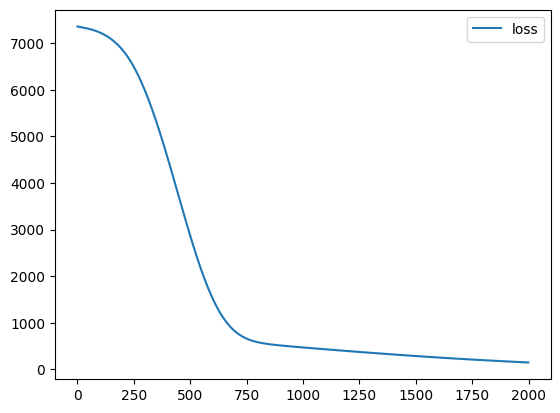

In [ ]:
loss_df=pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:
X_test1=Scaler.transform(X_test)
ai_brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 211.1086


211.108642578125

In [ ]:
X_n1=[[4]]
X_n1=Scaler.transform(X_n1)
ai_brain.predict(X_n1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[76.86949]], dtype=float32)

EXP 3



In [ ]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

X_train.shape

(60000, 28, 28)

In [ ]:

X_test.shape

(10000, 28, 28)

In [ ]:

single_image= X_train[0]

In [ ]:

single_image.shape

(28, 28)

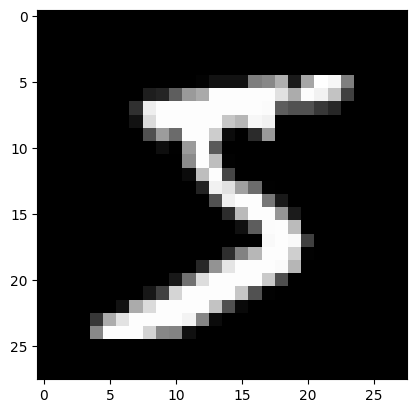

In [ ]:

plt.imshow(single_image,cmap='gray')


In [ ]:
y_train.shape

(60000,)

In [ ]:

X_train.min()

0

In [ ]:

X_train.max()

255

In [ ]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

5

numpy.ndarray

(60000, 10)

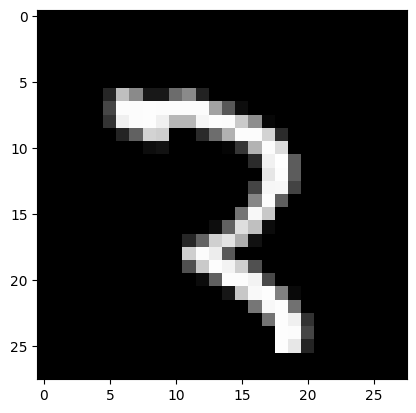

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │         247,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,986 (1.02 MB)

 Trainable params: 266,986 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 62ms/step - accuracy: 0.8862 - loss: 0.3714 - val_accuracy: 0.9827 - val_loss: 0.0535
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9847 - loss: 0.0511 - val_accuracy: 0.9885 - val_loss: 0.0358
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 61ms/step - accuracy: 0.9910 - loss: 0.0313 - val_accuracy: 0.9878 - val_loss: 0.0369
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9920 - loss: 0.0249 - val_accuracy: 0.9896 - val_loss: 0.0320
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 57ms/step - accuracy: 0.9949 - loss: 0.0159 - val_accuracy: 0.9865 - val_loss: 0.0467


,accuracy,loss,val_accuracy,val_loss
0,0.949650,0.166132,0.9827,0.053535
1,0.985483,0.047670,0.9885,0.035774
2,0.990333,0.032237,0.9878,0.036949
3,0.992250,0.024217,0.9896,0.031987
4,0.994200,0.017570,0.9865,0.046662


<Axes: >

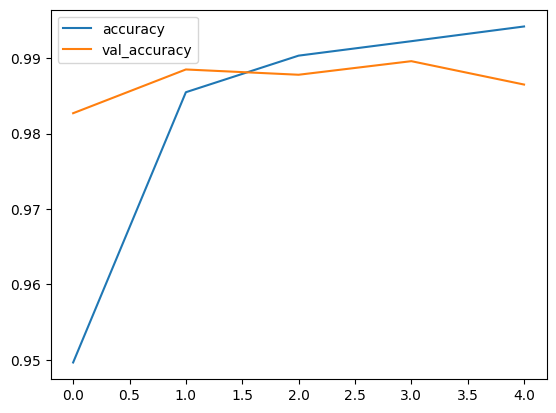

<Axes: >

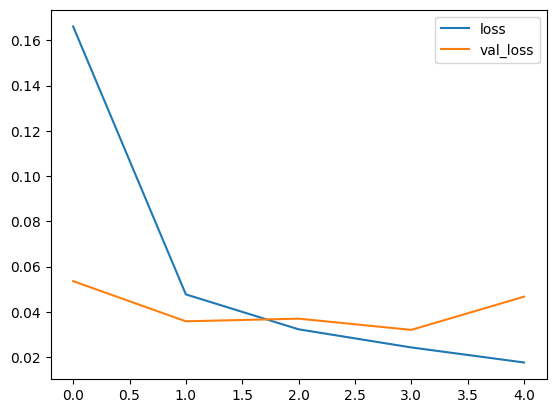

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


[[ 975    1    0    0    1    1    1    1    0    0]
 [   0 1130    0    1    1    0    2    0    0    1]
 [   0    4 1009    1    1    0    0   16    1    0]
 [   0    1    0  993    0    9    0    6    1    0]
 [   0    0    0    0  971    0    0    2    0    9]
 [   0    0    0    2    0  889    1    0    0    0]
 [   3    2    0    0    1   14  936    0    2    0]
 [   0    2    1    0    0    0    0 1022    1    2]
 [   7    0    0    5    0    3    1    4  949    5]
 [   1    2    1    1    4    7    0    2    0  991]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.96      1.00      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



PIL.WebPImagePlugin.WebPImageFile

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


[0]


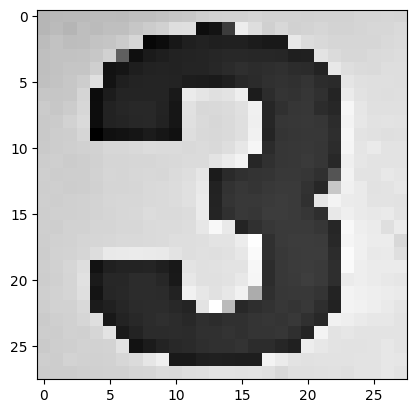

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[3]
